In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.nn import functional
from torch import optim




training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:03<00:00, 7.43MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 133kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 2.57MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 17.4MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



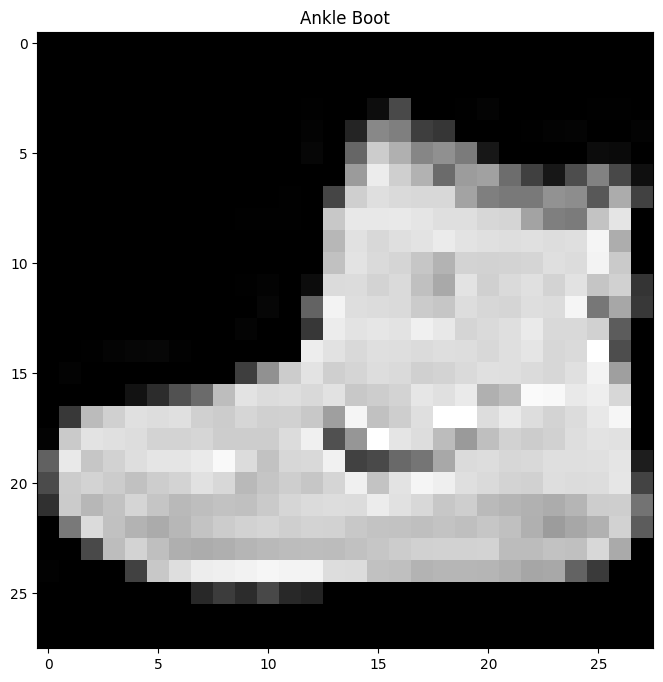

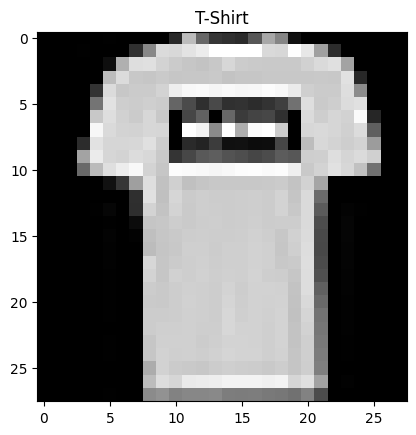

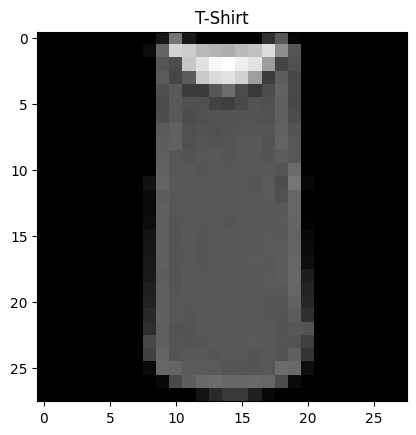

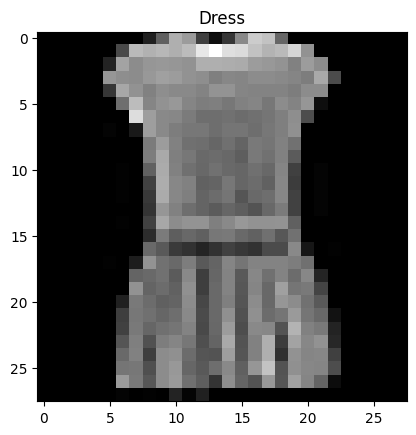

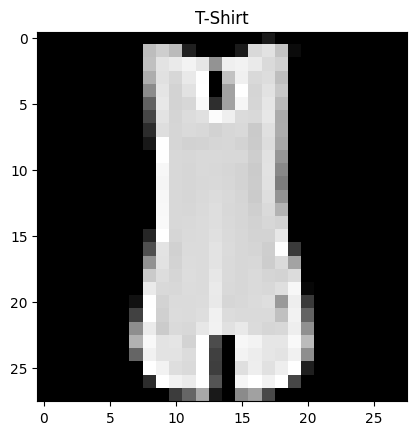

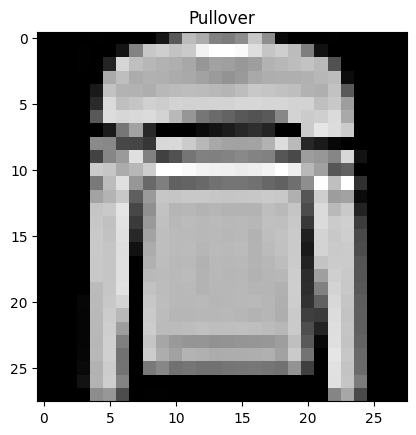

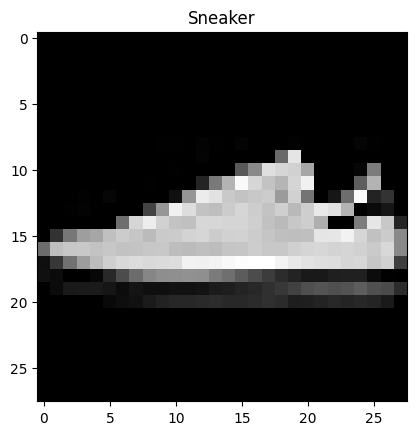

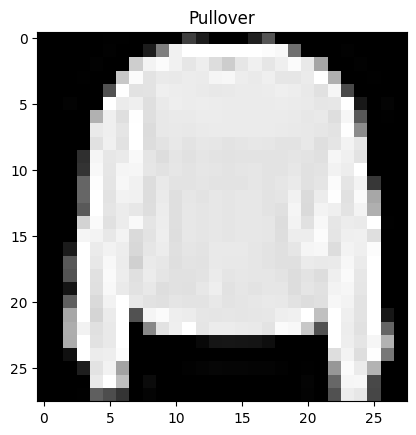

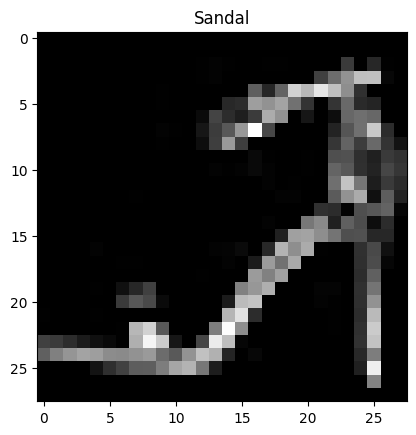

In [2]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
img, label = training_data[4]

for i in range(9):
  img, label = training_data[i]
  plt.title(label=labels_map[label])
  plt.imshow(img.squeeze(), cmap="gray")
  plt.show()

In [3]:
train_loader = DataLoader(training_data, batch_size = 64, shuffle = True)
test_loader = DataLoader(test_data, batch_size = 64, shuffle = True)

In [4]:
print(train_loader)

In [5]:
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()

    self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 3, stride = 1, padding = 1)
    self.relu1 = nn.ReLU()
    self.pool1 = nn.MaxPool2d(2, 2)

    self.conv2 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, stride = 1, padding = 1)
    self.relu2 = nn.ReLU()
    self.pool2 = nn.MaxPool2d(2, 2)

    self.fc1 = nn.Linear(in_features=64*7*7, out_features=128)
    self.relu3 = nn.ReLU()
    self.dropout = nn.Dropout(p = 0.5)

    self.fc2 = nn.Linear(in_features=128, out_features=10)

  def forward(self, x):
      x = self.conv1(x)
      x = self.relu1(x)
      x = self.pool1(x)

      x = self.conv2(x)
      x = self.relu2(x)
      x = self.pool2(x)

      x = x.view(x.size(0), -1)

      x = self.fc1(x)
      x = self.relu3(x)
      x = self.dropout(x)

      x = self.fc2(x)

      return x

In [6]:
hi = torch.tensor([[1, 3, 4], [1, 3, 4]])
torch.flatten(hi)

tensor([1, 3, 4, 1, 3, 4])

In [7]:
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [ ]:
# Number of epochs
num_epochs = 40

# Set the model to training mode
model.train()

for epoch in range(num_epochs):
    running_loss = 0.0
    for batch_idx, (images, labels) in enumerate(train_loader):
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)  # Outputs are raw logits
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Accumulate loss
        running_loss += loss.item()

        # Print statistics every 100 batches
        if (batch_idx + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

    # Print average loss after each epoch
    epoch_loss = running_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}] finished with average loss: {epoch_loss:.4f}')

Epoch [1/40], Step [100/938], Loss: 0.5865
Epoch [1/40], Step [200/938], Loss: 0.5549
Epoch [1/40], Step [300/938], Loss: 0.7833
Epoch [1/40], Step [400/938], Loss: 0.4267
Epoch [1/40], Step [500/938], Loss: 0.6746
Epoch [1/40], Step [600/938], Loss: 0.4462
Epoch [1/40], Step [700/938], Loss: 0.4601
Epoch [1/40], Step [800/938], Loss: 0.5608
Epoch [1/40], Step [900/938], Loss: 0.3206
Epoch [1/40] finished with average loss: 0.5891
Epoch [2/40], Step [100/938], Loss: 0.2943
Epoch [2/40], Step [200/938], Loss: 0.2550
Epoch [2/40], Step [300/938], Loss: 0.3139
Epoch [2/40], Step [400/938], Loss: 0.5363
Epoch [2/40], Step [500/938], Loss: 0.3072
Epoch [2/40], Step [600/938], Loss: 0.4220
Epoch [2/40], Step [700/938], Loss: 0.4287
Epoch [2/40], Step [800/938], Loss: 0.4979
Epoch [2/40], Step [900/938], Loss: 0.3254
Epoch [2/40] finished with average loss: 0.3836
Epoch [3/40], Step [100/938], Loss: 0.2560
Epoch [3/40], Step [200/938], Loss: 0.4830
Epoch [3/40], Step [300/938], Loss: 0.3183
E

In [ ]:
print("t")

In [ ]:
model.eval()
with torch.no_grad():
  correct = 0
  total = 0

  for images, labels in test_loader:
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    total+= labels.size(0)
    correct+=(predicted==labels).sum().item()

  print("test accuracy", 100*correct/total)

